<a href="https://colab.research.google.com/github/LinjingBi/ai_robotics_lab/blob/main/week3/lab_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas

In [ ]:
# Load the diabetes dataset
diabetes = load_diabetes()
y = diabetes.target  # diabetes progression

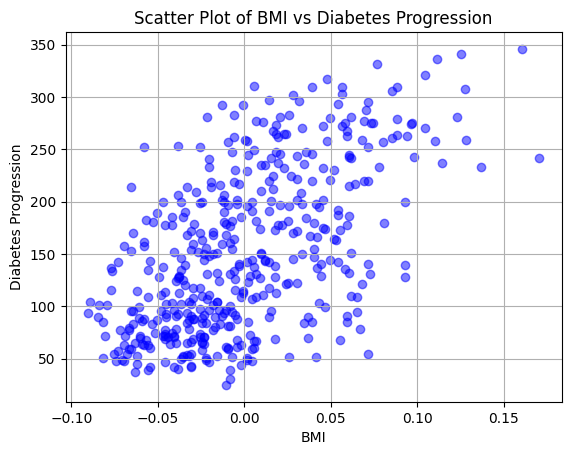

In [ ]:
bmi = diabetes.data[:, diabetes.feature_names.index('bmi')]
plt.scatter(bmi, y, color='blue', alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Diabetes Progression')
plt.title('Scatter Plot of BMI vs Diabetes Progression')
plt.grid(True)
plt.show()

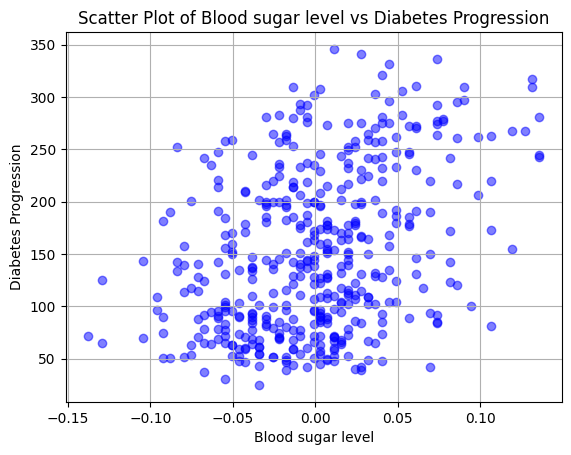

In [ ]:
diabetes.feature_names
glu = diabetes.data[:, diabetes.feature_names.index('s6')]
plt.scatter(glu, y, color='blue', alpha=0.5)
plt.xlabel('Blood sugar level')
plt.ylabel('Diabetes Progression')
plt.title('Scatter Plot of Blood sugar level vs Diabetes Progression')
plt.grid(True)
plt.show()

In [ ]:
bmi = bmi.reshape(-1, 1)
y = y.reshape(-1, 1)
x_train, x_test, Y_train, Y_test = train_test_split(bmi, y, random_state=5)

[[924.56094996]]
[151.3411379]
(111, 1)


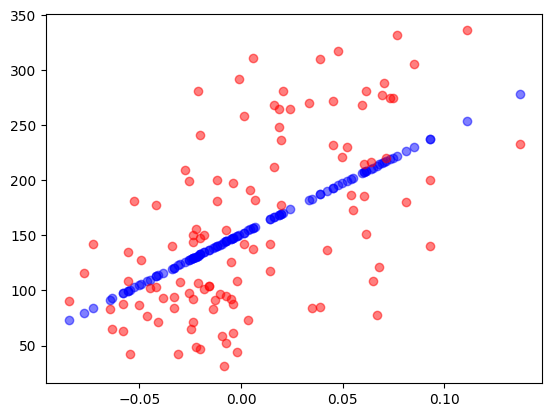

In [ ]:
# method 1. pure linear algebra
model = LinearRegression()
model.fit(x_train, Y_train)
print(model.coef_)
print(model.intercept_)

Y_predict = model.predict(x_test)
print(Y_predict.shape)
plt.scatter(x_test, Y_predict, color='blue', alpha=0.5)
plt.scatter(x_test, Y_test, color='red', alpha=0.5)

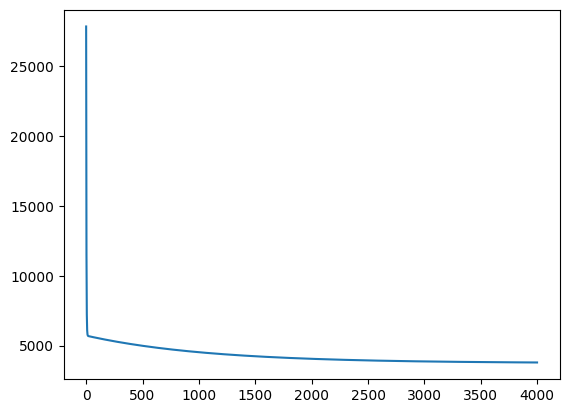

In [ ]:
# method 2. gradient descent
W = np.array([1])
b = 1
lr = 0.1
mse_list = []
ite = 4000

for _ in range(ite):
  Y_predict = np.dot(x_train, W) + b
  mse = ((Y_predict-Y_train.squeeze())**2).sum()/Y_predict.shape[0]
  gradient_w = np.dot(2*(Y_predict - Y_train.squeeze()), x_train).sum()/Y_predict.shape[0]
  W = W - lr*gradient_w
  gradient_b = 2*(Y_predict - Y_train.squeeze()).sum()/Y_predict.shape[0]
  b = b - lr*gradient_b

  mse_list.append(mse)
  # print(mse)
  # print(W)
  # print(b)

plt.plot(range(ite), mse_list)

In [ ]:
Y_predict_grad = np.dot(x_test, W) + b
Y_predict_lin = model.predict(x_test)
print(mean_squared_error(Y_test, Y_predict_grad))
print(mean_squared_error(Y_test, Y_predict_lin))

4438.590772727906
4326.125730168734


In [ ]:
# linear regression when using all features
x_all = diabetes.data

x_train, x_test, Y_train, Y_test = train_test_split(x_all, y, random_state=5)
model = LinearRegression()
model.fit(x_train, Y_train)

Y_predict = model.predict(x_test)
print(mean_squared_error(Y_test, Y_predict))

# lower MSE compared to one feature model

3042.019369346384


In [18]:
data = pandas.read_csv('titanic.csv')

X = data[['Pclass', 'Sex', 'Age', 'Siblings_SpousesAboard', 'Parents_ChildrenAboard', 'Fare']].copy()
sex_map = {'male': 0, 'female': 1}
X['Sex'] = X['Sex'].map(sex_map)
X.info()
y = data['Survived'].astype('bool')
y.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pclass                  887 non-null    int64  
 1   Sex                     887 non-null    int64  
 2   Age                     887 non-null    float64
 3   Siblings_SpousesAboard  887 non-null    int64  
 4   Parents_ChildrenAboard  887 non-null    int64  
 5   Fare                    887 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.7 KB
<class 'pandas.core.series.Series'>
RangeIndex: 887 entries, 0 to 886
Series name: Survived
Non-Null Count  Dtype
--------------  -----
887 non-null    bool 
dtypes: bool(1)
memory usage: 1019.0 bytes


In [19]:
X_train, X_tes, y_train, y_test = train_test_split(X, y, random_state=5)

              precision    recall  f1-score   support

       False       0.83      0.92      0.87       140
        True       0.84      0.68      0.75        82

    accuracy                           0.83       222
   macro avg       0.83      0.80      0.81       222
weighted avg       0.83      0.83      0.83       222



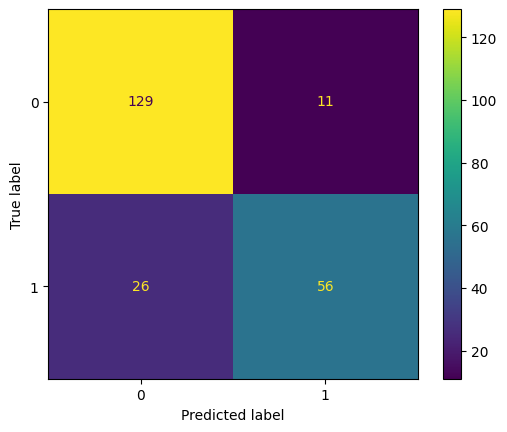

In [32]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_predict = model.predict(X_tes)
cm = confusion_matrix(y_test, y_predict)
ConfusionMatrixDisplay(cm).plot()

print(classification_report(y_test, y_predict))


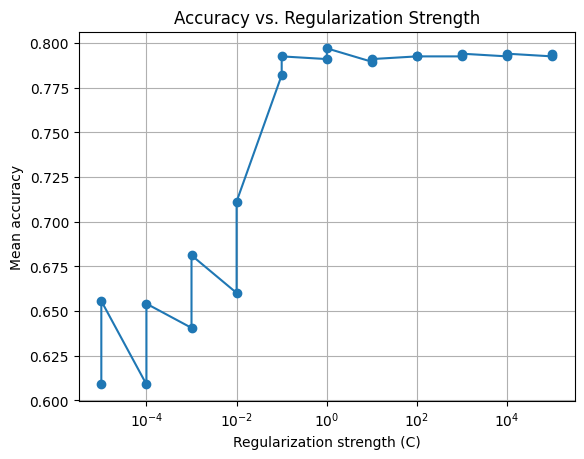

In [42]:
model = LogisticRegression(solver='liblinear')

param_grid = {'C': np.logspace(-5, 5, num=11),
              'penalty': ['l1', 'l2']}

# cv: cross-validation splitting strategy
gs = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
gs.fit(X_train, y_train)

results = gs.cv_results_
results_df = pandas.DataFrame(results)

plt.plot(results_df['param_C'], results_df['mean_test_score'], marker='o')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.xlabel('Regularization strength (C)')
plt.ylabel('Mean accuracy')
plt.title('Accuracy vs. Regularization Strength')
plt.grid(True)
plt.show()
